In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
bank = pd.read_csv("bank.csv", sep = ";")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,no


In [4]:
bank.shape

(4521, 17)

# Understand  distinct values of some columns

In [5]:
bank.y.value_counts()

no     3988
yes     519
No        6
NO        3
yEs       1
Yes       1
Name: y, dtype: int64

In [6]:
bank.isnull().sum()

age          0
job          3
marital      3
education    3
default      0
balance      1
housing      1
loan         0
contact      3
day          1
month        0
duration     2
campaign     0
pdays        0
previous     0
poutcome     0
y            3
dtype: int64

In [7]:
bank.job.value_counts()

management       968
blue-collar      946
technician       767
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     167
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [8]:
bank.marital.value_counts()

married     2796
single      1194
divorced     528
Name: marital, dtype: int64

In [9]:
bank.education.value_counts()

secondary    2304
tertiary     1349
primary       676
unknown       187
na              2
Name: education, dtype: int64

In [10]:
bank.duration.mean()

263.98495242310247

In [11]:
bank.day.mean()

15.915486725663717

In [12]:
bank.y.value_counts()

no     3988
yes     519
No        6
NO        3
yEs       1
Yes       1
Name: y, dtype: int64

In [13]:
bank.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

# Data Wrangling/Cleaning

In [13]:
bank = bank.fillna({"marital": "married"})

In [14]:
bank = bank.fillna({"education": "secondary"})

In [15]:
bank = bank.fillna({"job": "management"})

In [16]:
bank = bank.fillna({"job": "management"})

In [17]:
bank = bank.fillna({"duration": "263"})

In [18]:
bank = bank.fillna({"y": "no"})

In [27]:
bank.drop(['contact'], axis = 1, inplace = True)

In [19]:
bank.drop(['housing'], axis = 1, inplace = True)

In [20]:
bank.drop(['default'], axis = 1, inplace = True)

In [21]:
bank.drop(['day'], axis = 1, inplace = True)

In [22]:
bank.drop(['previous'], axis = 1, inplace = True)

In [23]:
bank.drop(['pdays'], axis = 1, inplace = True)

In [24]:
bank.drop(['campaign'], axis = 1, inplace = True)

In [25]:
bank.drop(['balance'], axis = 1, inplace = True)

In [28]:
# After cleaning the data, checking the null values one more time

bank.isnull().sum()

age          0
job          0
marital      0
education    0
loan         0
month        0
duration     0
poutcome     0
y            0
dtype: int64

In [29]:
#convert all the values yes and no to lower case

bank['y'] = bank['y'].str.lower() 

In [30]:
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

# Exploratory Data Analysis

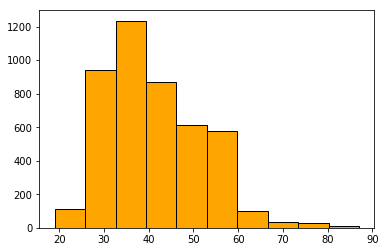

In [31]:
plt.hist(bank['age'],facecolor='orange',edgecolor='black', bins=10)
plt.show()

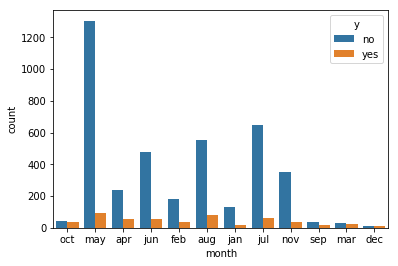

In [32]:
sns.countplot("month", hue='y', data=bank)

In [33]:
bank.head()

,age,job,marital,education,loan,month,duration,poutcome,y
0,30,unemployed,married,primary,no,oct,79,unknown,no
1,33,services,married,secondary,yes,may,220,failure,no
2,35,management,single,tertiary,no,apr,185,failure,no
3,30,management,married,tertiary,yes,jun,199,unknown,no
4,59,blue-collar,married,secondary,no,may,226,unknown,no


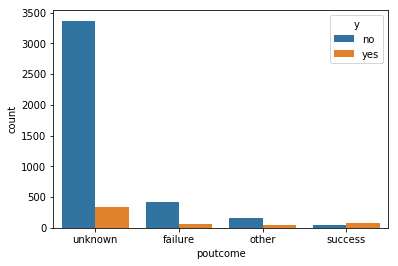

In [34]:
sns.countplot("poutcome", hue='y', data=bank)

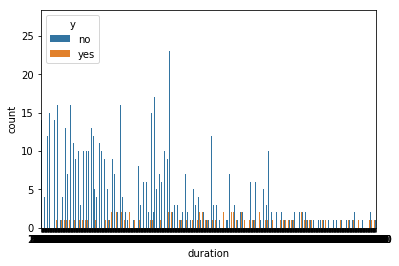

In [35]:
sns.countplot("duration", hue='y', data=bank)

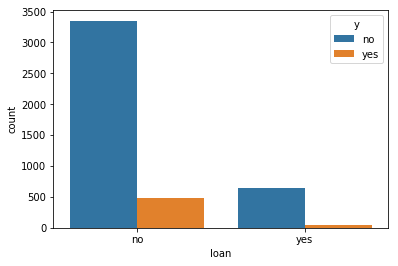

In [37]:
sns.countplot("loan", hue='y', data=bank)

# Work on converting the Catagorical values into binary

In [38]:
marital_mapping = {"married":1, "single":2, "divorced": 3} 
bank["marital"] = bank["marital"].map(marital_mapping)

In [39]:
bank.marital.value_counts()

1    2799
2    1194
3     528
Name: marital, dtype: int64

In [40]:
bank.head()

,age,job,marital,education,loan,month,duration,poutcome,y
0,30,unemployed,1,primary,no,oct,79,unknown,no
1,33,services,1,secondary,yes,may,220,failure,no
2,35,management,2,tertiary,no,apr,185,failure,no
3,30,management,1,tertiary,yes,jun,199,unknown,no
4,59,blue-collar,1,secondary,no,may,226,unknown,no


In [41]:
bank.education.value_counts()

secondary    2307
tertiary     1349
primary       676
unknown       187
na              2
Name: education, dtype: int64

In [42]:
bank['education'] = bank['education'].replace(['unknown', 'na'], 4)

In [43]:
bank['education'] = bank['education'].replace(['secondary'], 1)
bank['education'] = bank['education'].replace(['tertiary'], 2)
bank['education'] = bank['education'].replace(['primary'], 3)


In [47]:
bank['job'] = bank['job'].replace(['management', 'blue-collar','technician', 'admin.','services'], 1)

bank['job'] = bank['job'].replace(['self-employed', 'entrepreneur'], 2)
bank['job'] = bank['job'].replace(['retired', 'unemployed','housemaid', 'student','unknown'], 3)

In [53]:
bank.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [51]:
bank['month'] = bank['month'].replace(['jan', 'feb','mar'], 1)
bank['month'] = bank['month'].replace(['apr', 'may','jun'], 2)
bank['month'] = bank['month'].replace(['jul', 'aug','sep'], 3)
bank['month'] = bank['month'].replace(['oct', 'nov','dec'], 4)


In [54]:
bank['loan'] = bank['loan'].replace(['yes'], 1)
bank['loan'] = bank['loan'].replace(['no'], 2)

In [56]:
bank.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [57]:
bank['poutcome'] = bank['poutcome'].replace(['unknown','other'], 1)
bank['poutcome'] = bank['poutcome'].replace(['success'], 2)
bank['poutcome'] = bank['poutcome'].replace(['failure'], 3)

In [59]:
bank['y'] = bank['y'].replace(['no'], 0)
bank['y'] = bank['y'].replace(['yes'], 1)

In [60]:
bank.head()

,age,job,marital,education,loan,month,duration,poutcome,y
0,30,3,1,3,2,4,79,1,0
1,33,1,1,1,1,2,220,3,0
2,35,1,2,2,2,2,185,3,0
3,30,1,1,2,1,2,199,1,0
4,59,1,1,1,2,2,226,1,0


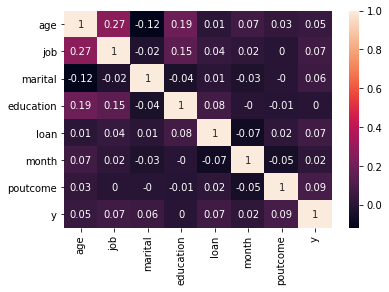

In [61]:
correlation_matrix = bank.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [62]:
bank.groupby('y').mean()

,age,job,marital,education,loan,month,poutcome
y,,,,,,,
0,40.998000,1.321250,1.482250,1.722500,1.838000,2.424500,1.225000
1,42.491363,1.477927,1.616123,1.725528,1.917466,2.483685,1.401152


# 1. Logistic Regression

In [79]:
#Splitting the Training Data

X = bank.drop(["y"],axis = 1)
y = bank["y"]

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=444)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train


,age,job,marital,education,loan,month,duration,poutcome
3545,55,3,1,1,1,2,58,1
2640,27,1,2,2,2,2,157,3
3534,47,1,2,1,2,2,104,3
3904,32,1,1,1,2,2,189,1
3094,56,3,1,1,2,2,484,3
697,34,1,1,1,2,3,144,1
2278,34,1,2,1,2,3,96,1
4299,37,1,1,1,1,3,187,1
1535,37,1,1,1,2,2,182,3
807,48,1,1,1,1,3,225,1


In [84]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predictions = model.predict(X_test)


In [86]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)


'             precision    recall  f1-score   support\n\n          0       0.89      0.99      0.94      1187\n          1       0.69      0.13      0.22       170\n\navg / total       0.86      0.88      0.85      1357\n'

In [87]:
y_test.value_counts()


0    1187
1     170
Name: y, dtype: int64

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


array([[1177,   10],
       [ 148,   22]], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)


0.8835666912306559

# Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
#acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
accuracy_decisiontree = accuracy_score(y_pred, y_test)
print(accuracy_decisiontree)

0.8577745025792188


# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
accuracy_randomforest = accuracy_score(y_pred, y_test)
print(accuracy_randomforest)

0.8828297715549005


# Support Vector Machine

In [99]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_svc = accuracy_score(y_pred, y_test)
print(accuracy_svc)

0.8725128960943257


# XG Boost

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
accuracy_gbk = accuracy_score(y_pred, y_test)
print(accuracy_gbk)

0.8931466470154753


# Naive Bayes

In [102]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
accuracy_gaussian = accuracy_score(y_pred, y_test) 
print(accuracy_gaussian)

0.8820928518791452
